In [1]:
!pip3 install opencv_python
!pip3 install numpy
!pip3 install matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# There are some problems in notebooks with cv2 imshow, use matplotlib instead.
# conversion needed
def plt_show(img):
	image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

	plt.imshow(image_rgb)
	plt.axis('off')
	plt.show()

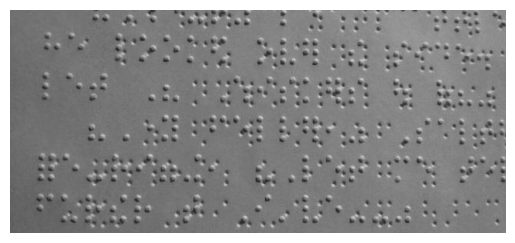

In [85]:
# Cargar imagen
image = cv2.imread("../images/Roboflow/0014.jpg", cv2.IMREAD_GRAYSCALE)
plt_show(image)

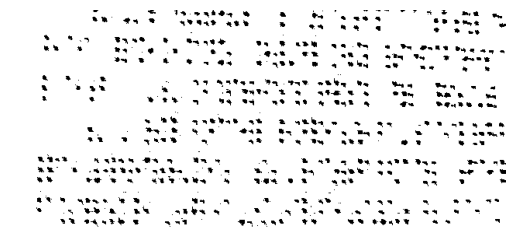

In [86]:
# Preprocesamiento
blurred = cv2.GaussianBlur(image, (7, 7), 5)
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 5, 1.5)
plt_show(binary)


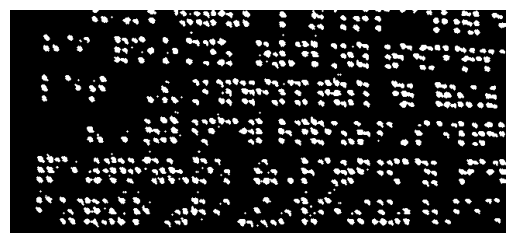

In [87]:
# Transformada morfológica
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
morphed = cv2.erode(binary, kernel, iterations=1)
_, morphed = cv2.threshold(morphed, 127, 255, cv2.THRESH_BINARY_INV)
plt_show(morphed)


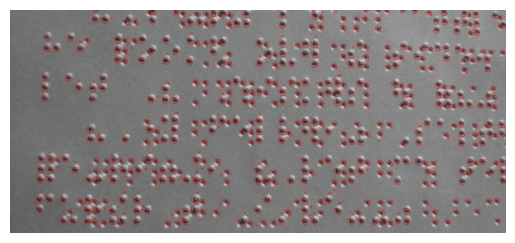

In [88]:
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create a plot
fig, ax = plt.subplots()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax.imshow(image_rgb)
ax.axis('off')  # Hide axis

# Iterate through the contours and plot each one
for contour in contours:
    contour = contour.squeeze()  # Removes unnecessary extra dimensions
    ax.plot(contour[:, 0], contour[:, 1], color='red', linewidth=.3)  # Plot contour points

plt.show()